In [1]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

https://www.youtube.com/watch?v=98xF6b0PZpo

In [2]:
tqqq = yf.Ticker("TQQQ")
tqqq_hist = tqqq.history(period="max")
tqqq_hist = tqqq_hist.reset_index()

In [3]:
tqqq_hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-02-11,0.81,0.87,0.81,0.86,1728000,0.0,0.0
1,2010-02-12,0.84,0.87,0.83,0.87,4300800,0.0,0.0
2,2010-02-16,0.89,0.90,0.87,0.90,4809600,0.0,0.0
3,2010-02-17,0.91,0.92,0.90,0.92,9590400,0.0,0.0
4,2010-02-18,0.91,0.94,0.91,0.93,19430400,0.0,0.0


In [4]:
log_returns = np.log(tqqq_hist.Close/tqqq_hist.Close.shift(1))[2200:]
log_returns

2200    0.020778
2201    0.088153
2202   -0.017233
2203   -0.052433
2204   -0.091951
          ...   
2766    0.019374
2767   -0.000466
2768   -0.007107
2769    0.016014
2770    0.016852
Name: Close, Length: 571, dtype: float64

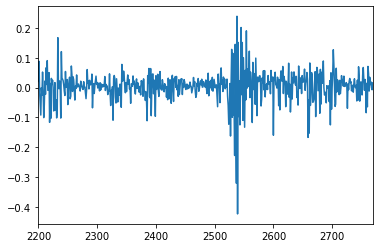

In [5]:
log_returns.plot()

In [6]:
mean = np.sum(log_returns)/len(log_returns)
var = np.sum(np.power(log_returns-mean,2))/len(log_returns)

In [7]:
mean, var

(0.0025467792762803518, 0.0027765464934378452)

In [8]:
GBM_drift = mean - var/2
GBM_vol = var

In [9]:
GBM_drift, GBM_vol

(0.0011585060295614292, 0.0027765464934378452)

In [10]:
x_0 = tqqq_hist.Close[0]

In [11]:
x_0

0.86

In [12]:
def GBM(x_t, delta_T, mu, sigma):
    return x_t*np.exp(mu*delta_T + np.sqrt(sigma*delta_T)*np.random.normal(0,1,1))

In [13]:
days = len(tqqq_hist.Close)
delta_T = 1
results = np.zeros(days)
days = np.arange(days)

In [27]:
for day in days:
    if day == 0:
        results[day] = x_0
    else:
        results[day] = GBM(results[day-1],delta_T,GBM_drift, GBM_vol)

In [28]:
results

array([  0.86      ,   0.79755693,   0.74619689, ..., 210.8975355 ,
       207.01469622, 199.9682518 ])

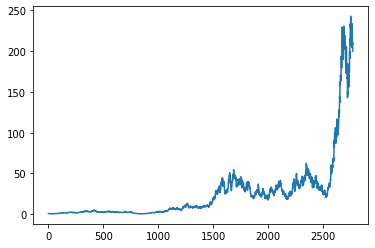

In [29]:
sns.lineplot(days,results)

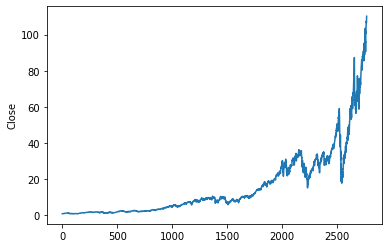

In [17]:
sns.lineplot(days,tqqq_hist.Close)

In [18]:
import pandas as pd
import datetime

df_compare = pd.DataFrame({"Date":tqqq_hist.Date,"results":results, "Close": tqqq_hist.Close})

df_compare.set_index('Date', inplace=True)

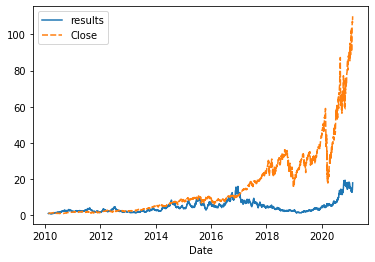

In [19]:
sns.lineplot(data=df_compare)